## Objective
* The objective of this exercise is to explore and visualize the Traffic Index dataset to gain insights and understand the patterns in the data.

##Dataset Description

| Column Name | Description | Data Type |
| :---------------- | :------: | ----: |
|   City  |   Name of the city	   | Object |
| Datetime           |   Date and time of the data entry	   | Object |
|  TrafficIndexLive    |  Real-time traffic index	   | Int |
|  Jamscount |  Number of traffic jams	   | Int |
|   JamsDelay  |   Total delay caused by traffic jams (in minutes)	   | Float |
|JamsLength           |   Total length of traffic jams (in kilometers)	   | Float |
|  TrafficIndexWeekAgo    |  Traffic index one week ago	   | Int |
|  TravelTimeHistoric |  Historical average travel time (in minutes)	   | Float |
|   TravelTimeLive  |   Real-time travel time (in minutes)	   | Float |


# Tasks

## 1. Exploratory Data Analysis (EDA)

### Perform summary statistics on the dataset.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [3]:
#Read The dataset
traffic_data2 = pd.read_csv('/content/Task (2) Dataset.csv')

#traffic_data2_ = pd.read_excel('/content/Task (2) Dataset.xlsx', sheet_name='Task (2) Dataset')

In [4]:
#Calculate total and percent of null values in the dataset
total = traffic_data2.isnull().sum().sort_values(ascending=False)
percent = round((traffic_data2.isnull().sum()/traffic_data2.isnull().count()*100),1)

missing_values = pd.concat([total,percent],axis=1, keys=['Total','%'])

missing_values

,Total,%
TravelTimeHistoric,3867,5.8
TravelTimeLive,3867,5.8
City,0,0.0
Datetime,0,0.0
TrafficIndexLive,0,0.0
JamsDelay,0,0.0
JamsCount,0,0.0
TrafficIndexWeekAgo,0,0.0
JamsLength,0,0.0


In [5]:
#impute missing values in TravelTimeHistoric, TravelTimeLive

imputer = SimpleImputer()

traffic_data2['imputed_TravelTimeHistoric'] = imputer.fit_transform(traffic_data2[['TravelTimeHistoric']])
traffic_data2['imputed_TravelTimeLive'] = imputer.fit_transform(traffic_data2[['TravelTimeLive']])

In [6]:
#Drop columns with missing values

traffic_data2.drop(columns=['TravelTimeHistoric','TravelTimeLive'], inplace=True)

In [7]:
#Check for total and percent of null values in the dataset

total = traffic_data2.isnull().sum().sort_values(ascending=False)
percent = round((traffic_data2.isnull().sum()/traffic_data2.isnull().count()*100),1)

missing_values = pd.concat([total,percent],axis=1, keys=['Total','%'])

missing_values

,Total,%
City,0,0.0
Datetime,0,0.0
TrafficIndexLive,0,0.0
JamsCount,0,0.0
JamsDelay,0,0.0
JamsLength,0,0.0
TrafficIndexWeekAgo,0,0.0
imputed_TravelTimeHistoric,0,0.0
imputed_TravelTimeLive,0,0.0


In [8]:
traffic_data2['Datetime'] = traffic_data2['Datetime'].astype('datetime64[ns]')

### Identify and analyze patterns in the data.

In [9]:
#Summary statistics of dateset

traffic_data2.describe(include='all').transpose()

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
City,66639,11,Doha,8692,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Datetime,66639,NaN,NaN,NaN,2023-07-21 19:21:11.079652864,2022-12-16 11:01:30,2023-05-04 19:01:15,2023-08-11 02:16:30,2023-10-13 05:01:30,2023-12-15 08:46:30,NaN
TrafficIndexLive,66639.0,NaN,NaN,NaN,14.043113,0.0,3.0,10.0,21.0,138.0,13.488906
JamsCount,66639.0,NaN,NaN,NaN,74.278531,0.0,9.0,29.0,95.0,1359.0,107.452022
JamsDelay,66639.0,NaN,NaN,NaN,288.353877,0.0,27.7,95.7,336.6,9989.4,470.013224
JamsLength,66639.0,NaN,NaN,NaN,49.316135,0.0,3.0,12.2,53.5,1173.9,85.352525
TrafficIndexWeekAgo,66639.0,NaN,NaN,NaN,13.981737,0.0,3.0,10.0,21.0,138.0,13.454922
imputed_TravelTimeHistoric,66639.0,NaN,NaN,NaN,70.706601,49.381346,63.525681,69.682368,75.697609,120.140593,10.276571
imputed_TravelTimeLive,66639.0,NaN,NaN,NaN,70.048451,46.723235,61.195288,69.286516,76.389208,134.484139,11.614321


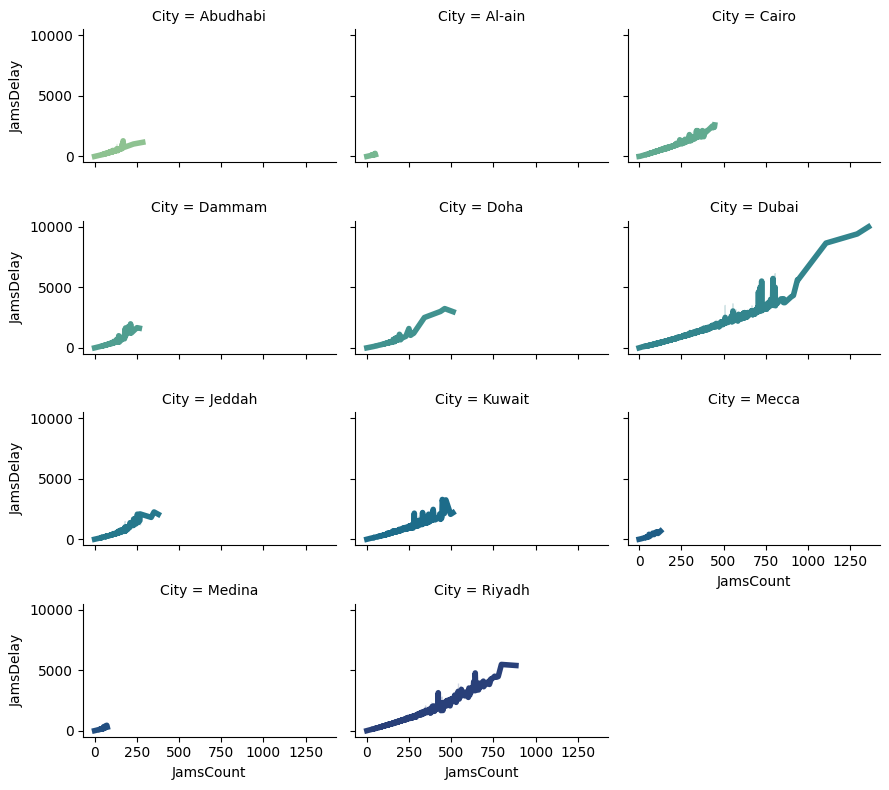

In [11]:
g = sns.relplot(
    data=traffic_data2,
    x="JamsCount", y="JamsDelay", col="City", hue="City",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend=False,
)

### Visualize the distribution of key variables (e.g., Traffic_Index, Date).

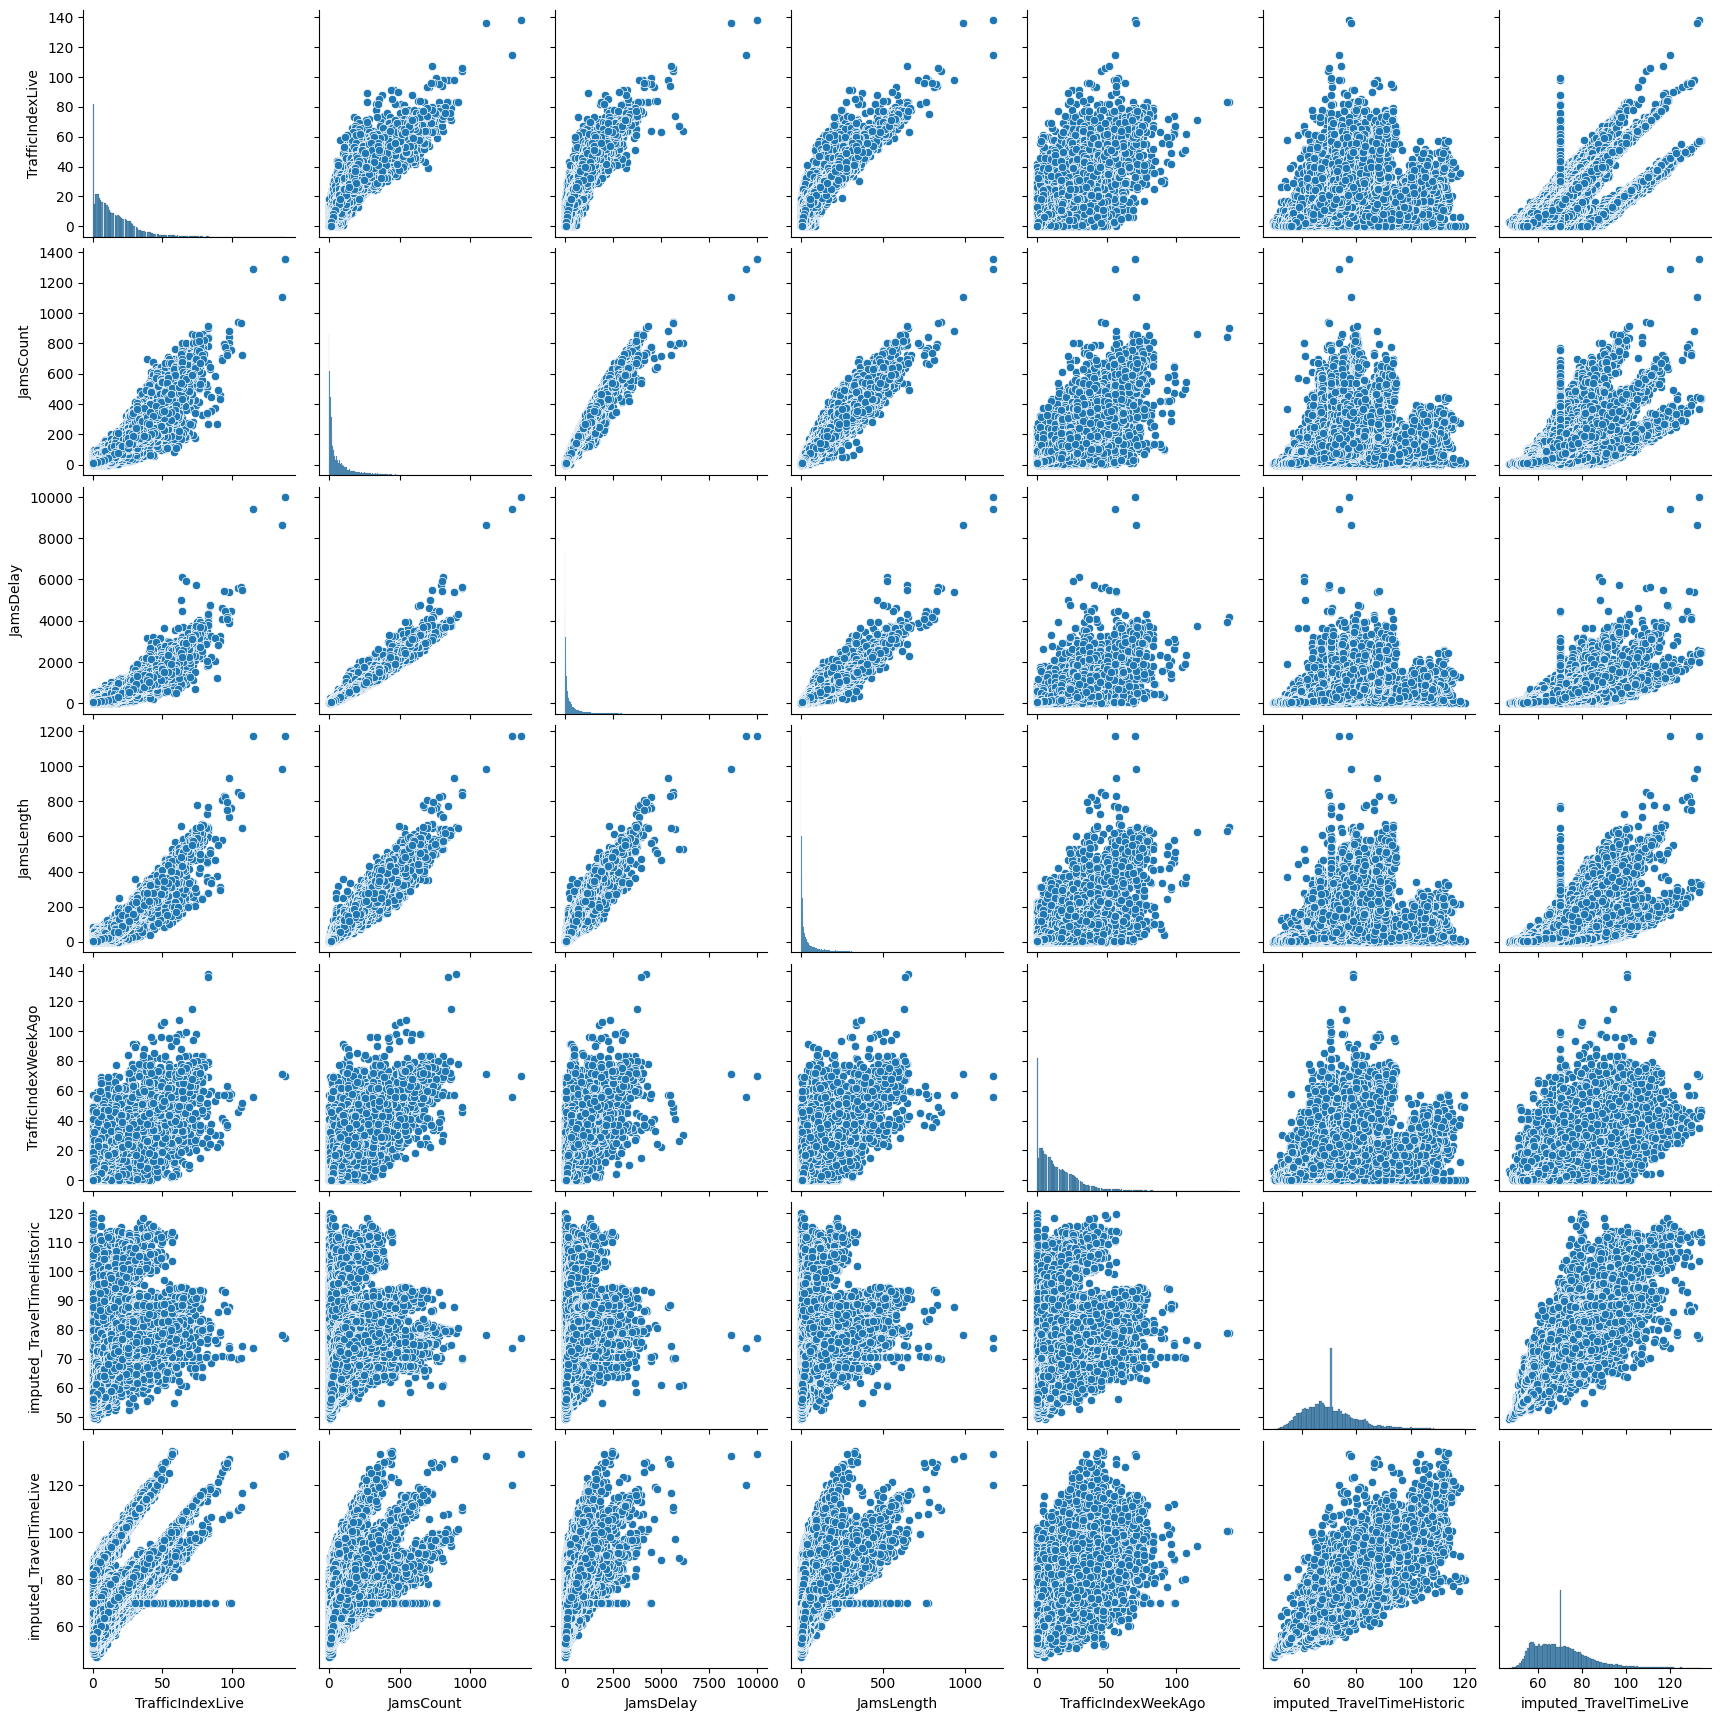

In [12]:
sns.pairplot(traffic_data2)

### Explore relationships between variables (e.g., Traffic_Index vs. Weather_Condition).


In [13]:
corr = traffic_data2.corr(numeric_only=True)
corr

,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,imputed_TravelTimeHistoric,imputed_TravelTimeLive
TrafficIndexLive,1.000000,0.876216,0.861349,0.866799,0.903282,0.318048,0.617056
JamsCount,0.876216,1.000000,0.982459,0.952762,0.806545,0.293409,0.545034
JamsDelay,0.861349,0.982459,1.000000,0.962679,0.775028,0.291695,0.548550
JamsLength,0.866799,0.952762,0.962679,1.000000,0.787548,0.292110,0.542682
TrafficIndexWeekAgo,0.903282,0.806545,0.775028,0.787548,1.000000,0.314476,0.550819
imputed_TravelTimeHistoric,0.318048,0.293409,0.291695,0.292110,0.314476,1.000000,0.892562
imputed_TravelTimeLive,0.617056,0.545034,0.548550,0.542682,0.550819,0.892562,1.000000


In [ ]:
#Top four was found correlation in:

#1. JamsCount VS JamsDelay
#2. JamsDelay vs JamsLength
#3. JamsLength VS JamsCount
#4. TrafficIndexWeekAgo VS TrafficIndexLive

## 2. Data Visualization

* Ensure the visualizations are clear and informative.

### Create visualizations to illustrate the findings from the EDA.


<Axes: xlabel='JamsDelay', ylabel='JamsCount'>

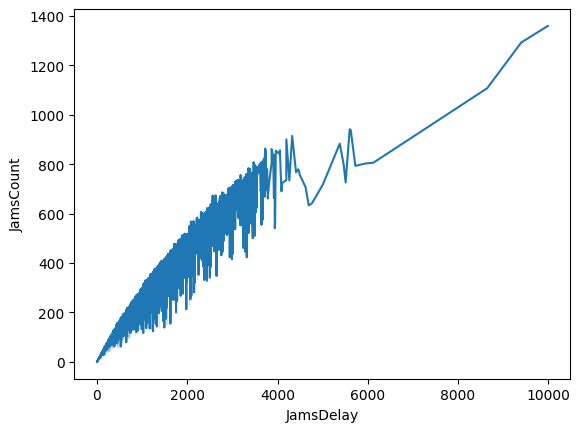

In [14]:
#The effect of the Number of traffic jams over the total delay caused, it was showing a positiev relation during the EDA.

sns.lineplot(data= traffic_data2, y='JamsDelay', x='JamsCount', hue='Datetime')

### Use appropriate plots such as histograms, bar charts, pie charts, scatter plots, and heatmaps.

<Axes: >

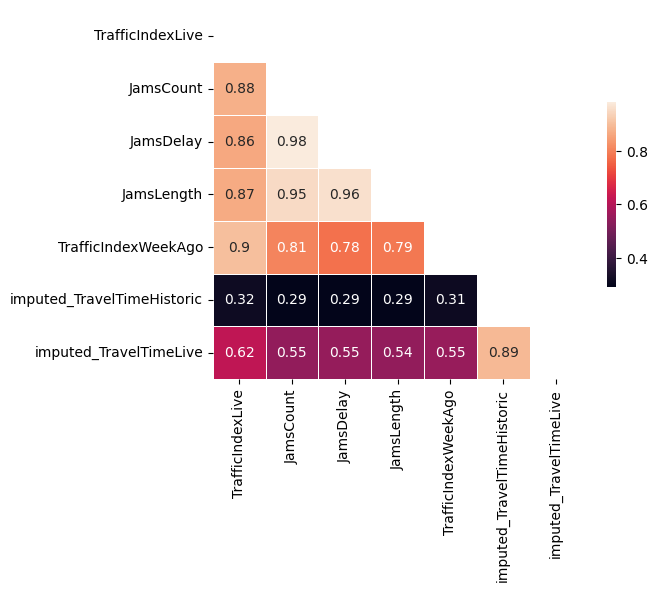

In [16]:

mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, mask=mask, annot=True, square=True, linewidths=.5, cbar_kws={"shrink": .5})

## 3. Insights and Conclusions

* <h3>Summarize the key insights gained from the data analysis.<h3/>
 <h4>
      
  
      No of trffic jams and its length are affecting the time travel.
      
      Comparing history travel time to live time the delayed time is increasing.

      Top 2 cities in time delating and jams count are Dubai and Riyadh. <h4/>

* <h3>Draw conclusions based on the patterns observed in the data.<h3/>


